## プロポーショナル・ハザードモデル（比例ハザードモデル）について

プロポーショナル・ハザードモデル（比例ハザードモデル、Cox比例ハザードモデルとも呼ばれる）は、生存時間分析に広く使用される統計モデルです。これは、特定の時間までに事象（例えば、死亡、故障、離脱など）が発生するリスクを解析するための手法です。

### 基本概念

比例ハザードモデルは、以下のようにハザード関数を定義します：

$$
h(t | \mathbf{x}) = h_0(t) \exp(\beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p)
$$

ここで、
- $h(t | \mathbf{x})$ は、時間 $t$ におけるハザード関数です。これは、時間 $t$ において事象が発生する即時リスクを表します。
- $h_0(t)$ は、基準ハザード関数（ベースラインハザード関数）です。これは、すべての説明変数がゼロの場合のハザード率です。
- $\beta_1, \beta_2, \ldots, \beta_p$ は回帰係数です。
- $x_1, x_2, \ldots, x_p$ は説明変数（共変量）です。

### モデルの仮定

比例ハザードモデルの主な仮定は、説明変数の効果が時間に依存せず比例的であることです。具体的には、説明変数の効果がハザード関数に対して時間と無関係に一定の比率で影響を与えると仮定します。

### パラメータ推定

比例ハザードモデルのパラメータ（$\beta$）は、部分尤度（partial likelihood）を最大化することで推定されます。この方法は、ベースラインハザード関数を明示的に推定することなく、説明変数の効果を評価できます。

### 生存分析の用語

- **生存時間（Survival Time）**:
    観測開始から事象（例えば、死亡、故障、離脱など）が発生するまでの時間です。

- **検閲（Censoring）**:
    事象が発生せずに観測が終了することです。例えば、研究期間が終了するまでに死亡しなかった患者は右側検閲（右検閲）されます。

- **ハザード関数（Hazard Function）**:
    ある時点で事象が発生する即時リスクを表します。

### Pythonコード例

以下に、Pythonを用いた比例ハザードモデルの実装例を示します。ここでは、`lifelines` パッケージを使用してモデルを適用します。


### 結果の解釈

モデルを適用すると、以下のような情報が得られます：

- **係数（$\beta$）**:
    各説明変数に対する回帰係数が表示されます。正の係数は、変数が増加するにつれてハザードが増加することを示し、負の係数はハザードが減少することを示します。

- **p値**:
    係数の統計的有意性を評価するためのp値が表示されます。p値が小さいほど、その変数がモデルにとって重要であることを示します。

- **ハザード比（Hazard Ratio）**:
    係数の指数関数を取った値であり、変数が1単位増加したときのハザード比率を示します。ハザード比が1より大きければリスクが増加し、1より小さければリスクが減少します。

例えば、以下のような出力が得られるとします：

```
                   coef  exp(coef)  se(coef)    z      p  lower 0.95  upper 0.95
fin             -0.379    0.685    0.191  -1.988  0.047     -0.754      -0.004
age             -0.057    0.944    0.022  -2.575  0.010     -0.100      -0.014

```

ここで、`fin` 変数の係数が -0.379 である場合、ハザード比は $exp(-0.379) = 0.685$ です。これは、`fin` が1単位増加すると、ハザードが0.685倍になること、すなわちリスクが減少することを示します。

比例ハザードモデルは、生存時間データの解析において非常に強力なツールであり、様々な分野で広く応用されています。

   week  arrest  fin  age  race  wexp  mar  paro  prio
0    20       1    0   27     1     0    0     1     3
1    17       1    0   18     1     0    0     1     8
2    25       1    0   19     0     1    0     1    13
3    52       0    1   23     1     1    1     1     1
4    52       0    0   19     0     1    0     1     3


<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
      baseline estimation = breslow
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -658.75
         time fit was run = 2024-07-05 23:37:23 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
fin       -0.38      0.68      0.19           -0.75           -0.00                0.47                1.00
age       -0.06      0.94      0.02           -0.10           -0.01                0.90                0.99
race       0.31      1.37      0.31           -0.29            0.92                0.75                2.50
wexp      -0.15      0.86      0.21           -0.57            0.27                0.57                1.30
mar       -0.43      0.65      0.38           -1.18            0.31                0.31                1.37
paro      -0.08      0.92      0.20           -0.47            0.30                0.63                1.35
prio       0.09      1.10      0.03            0.04            0.15                1.04                1.16

           cmp to     z      p  -log2(p)
covariate                               
fin          0.00 -1.98   0.05      4.40
age          0.00 -2.61   0.01      6.79
race         0.00  1.02   0.31      1.70
wexp         0.00 -0.71   0.48      1.06
mar          0.00 -1.14   0.26      1.97
paro         0.00 -0.43   0.66      0.59
prio         0.00  3.19 <0.005      9.48
---
Concordance = 0.64
Partial AIC = 1331.50
log-likelihood ratio test = 33.27 on 7 df
-log2(p) of ll-ratio test = 15.37

<Axes: xlabel='log(HR) (95% CI)'>

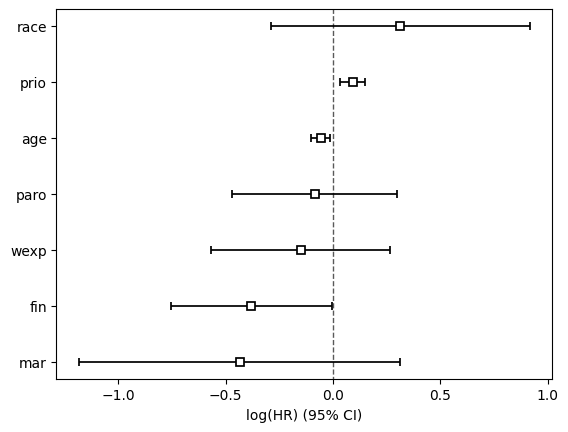

In [1]:
import pandas as pd
from lifelines import CoxPHFitter
from lifelines.datasets import load_rossi

# データセットの読み込み
data = load_rossi()

# データフレームの内容を表示
print(data.head())

# Cox比例ハザードモデルの作成
cph = CoxPHFitter()
cph.fit(data, duration_col='week', event_col='arrest')

# モデルの要約を表示
cph.print_summary()

# 回帰係数のプロット
cph.plot()